In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/bartu/Downloads/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv")

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

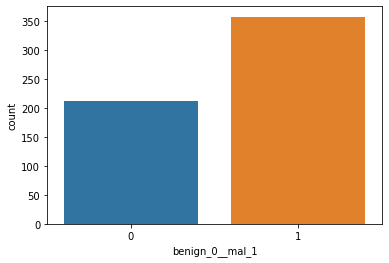

In [10]:
sns.countplot(x = "benign_0__mal_1", data = df)

<AxesSubplot:>

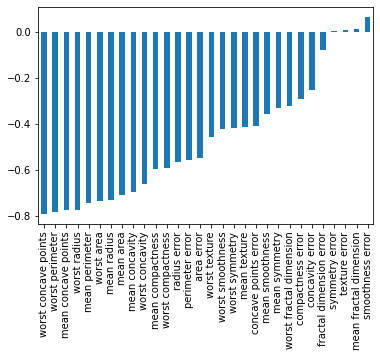

In [13]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind = "bar") ## Label column dropped with the use of [:-1].

In [15]:
x = df.drop("benign_0__mal_1", axis = 1).values
y = df["benign_0__mal_1"].values

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
x_train = scaler.fit_transform(x_train)

In [23]:
x_test = scaler.transform(x_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
x_train.shape

(426, 30)

In [29]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))

## Binary Classification
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [30]:
model.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6561 - val_loss: 0.6385
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6176 - val_loss: 0.6020
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5785 - val_loss: 0.5588
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5282 - val_loss: 0.5007
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4709 - val_loss: 0.4439
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4151 - val_loss: 0.3869
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3649 - val_loss: 0.3345
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3215 - val_loss: 0.2978
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2864 - val_loss: 0.2626
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2591 - val_loss: 0.2370
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1284
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0483 - val_loss: 0.1270
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.1275
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.1168
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1239
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.1323
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0475 - val_loss: 0.1239
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0474 - val_loss: 0.1344
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.1340
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.1399
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.1545
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0399 - val_loss: 0.1438
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0372 - val_loss: 0.1534
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.1456
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.1482
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0376 - val_loss: 0.1459
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0387 - val_loss: 0.1459
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0467 - val_loss: 0.1503
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.1368
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0404 - val_loss: 0.1591
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.1884
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.1580
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 0.1636
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0306 - val_loss: 0.1575
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1736
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.1650
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0311 - val_loss: 0.1766
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0356 - val_loss: 0.1616
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.1751
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.1728
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0240 - val_loss: 0.1920
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.2120
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1819
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.1917
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0247 - val_loss: 0.1955
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.1912
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.1965
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.1968
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.2023
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1845
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.1999
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.2695
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.1903
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.2543
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.2124
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.2442
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.2126
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.2272
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.2123
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.2258
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.2710
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.2470
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.3317
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.2560
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.2777
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.2472
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.2935
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.2590
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.2748
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.2730
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.3296
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.3545
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.3271
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.3681
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.3424
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.3610
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.3427
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.3609
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.3661
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.3526
Epoc

In [31]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

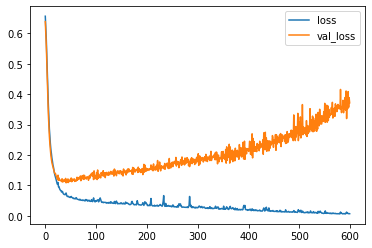

In [34]:
## We have clearly overfitted here.
losses.plot()

In [38]:
## Create the same exact model again to use EarlyStopping.
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))

## Binary Classification
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [42]:
model.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6776 - val_loss: 0.6536
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6359 - val_loss: 0.6100
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5870 - val_loss: 0.5615
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5378 - val_loss: 0.5083
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4881 - val_loss: 0.4589
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4414 - val_loss: 0.4112
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3953 - val_loss: 0.3689
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3603 - val_loss: 0.3272
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3241 - val_loss: 0.2985
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2957 - val_loss: 0.2651
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.1077
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0612 - val_loss: 0.1051
Epoch 00084: early stopping


<AxesSubplot:>

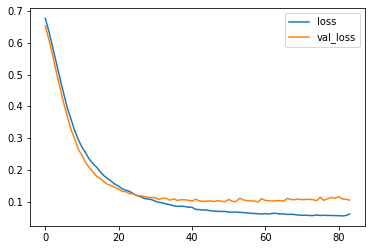

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [47]:
## Create the same exact model again to use Dropout.
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.5))


## Binary Classification
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [48]:
model.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7152 - val_loss: 0.6880
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6860 - val_loss: 0.6787
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6797 - val_loss: 0.6701
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6695 - val_loss: 0.6569
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6610 - val_loss: 0.6418
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6480 - val_loss: 0.6318
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6327 - val_loss: 0.6150
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6177 - val_loss: 0.5930
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5974 - val_loss: 0.5689
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5636 - val_loss: 0.5417
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.0929
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.0861
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1183 - val_loss: 0.0807
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1072 - val_loss: 0.0897
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1117 - val_loss: 0.0915
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1097 - val_loss: 0.0821
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1144 - val_loss: 0.0785
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1128 - val_loss: 0.0970
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0977 - val_loss: 0.0971
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1140 - val_loss: 0.0819
Epoch 93/600


<AxesSubplot:>

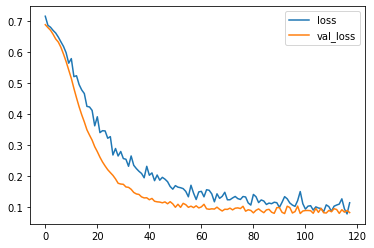

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [51]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [57]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
